## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

###1. Import and set and Tensorflow 2 and verify version

In [0]:
%tensorflow_version 2.x

In [148]:
import tensorflow as tf
tf.__version__

'2.1.0-rc1'

### 2. Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

###3. Create a list 'class_names' of below Class Names
**Class - Class Name** ==> 
0 - T-shirt, 
1 - Trouser, 
2 - Pullover, 
3 - Dress, 
4 - Coat, 
5 - Sandal, 
6 - Shirt, 
7 - Sneaker, 
8 - Bag, 
9 - Ankle boot,

In [150]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names


['T-shirt',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [151]:
class_names[6]

'Shirt'

###4. Find no.of samples in training and test dataset

In [152]:
print('Number of samples in the training set is', x_train.shape[0])
print('Number of samples in the test set is', x_test.shape[0])

Number of samples in the training set is 60000
Number of samples in the test set is 10000


###5. Find dimensions of an image in the dataset

In [153]:
print('Dimension of the image in the data set is', x_train.shape[1:3])

Dimension of the image in the data set is (28, 28)


### 6. Verify if existing labels/Classes are correct 

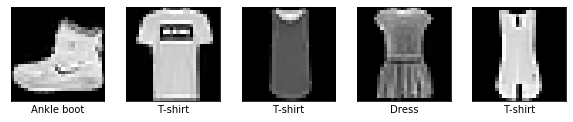

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()



*   The existing lables are correct 



### 7. Convert train and test labels to one hot vectors

** check `tensorflow.keras.utils.to_categorical()` **

In [0]:
y_train_encode = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_encode = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [156]:
y_train[0]

9

###8. Normalize both the train and test image data from 0-255 to 0-1

In [0]:

import numpy as np

In [0]:
x_train_scaled = np.subtract(x_train, np.min(x_train))/np.subtract(np.max(x_train),np.min(x_train))


In [159]:
np.max(x_train_scaled)

1.0

In [0]:
x_test_scaled = np.subtract(x_test, np.min(x_train))/np.subtract(np.max(x_train),np.min(x_train))

In [161]:
np.max(x_test_scaled)

1.0

###9. Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras
check `tensorflow.keras.backend.expand_dims`


In [162]:
x_train_scaled2 = tf.keras.backend.expand_dims(
    x_train_scaled,
    axis=-1
)
x_train_scaled2.shape

TensorShape([60000, 28, 28, 1])

In [163]:
x_test_scaled2 = tf.keras.backend.expand_dims(x_test_scaled, axis = -1)
x_test_scaled2.shape

TensorShape([10000, 28, 28, 1])

###10. Import the necessary layers from keras to build the model

In [0]:
from tensorflow.keras import models, layers, backend

### 11. Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with no.of `epochs=10`. **

In [0]:
backend.clear_session()
model = models.Sequential()
model.add(layers.Reshape((28,28,1),input_shape=(28,28,1)))

#Add first convolutional layer
model.add(layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
#model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Flatten the output
model.add(layers.Flatten())

#Dense layer
model.add(layers.Dense(128, activation='relu'))

#Add another dropout layer
#model.add(tf.keras.layers.Dropout(0.25))

#Output layer
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [167]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
______________________________________________

In [168]:
#Train the model
model.fit(x_train_scaled2,y_train_encode,          
          validation_data=(x_test_scaled2,y_test_encode),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.3678 - accuracy: 0.8687 - val_loss: 0.2916 - val_accuracy: 0.8921
Epoch 2/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2302 - accuracy: 0.9150 - val_loss: 0.2554 - val_accuracy: 0.9064
Epoch 3/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1673 - accuracy: 0.9374 - val_loss: 0.2601 - val_accuracy: 0.9083
Epoch 4/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1150 - accuracy: 0.9576 - val_loss: 0.2843 - val_accuracy: 0.9060
Epoch 5/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0775 - accuracy: 0.9713 - val_loss: 0.3149 - val_accuracy: 0.9133
Epoch 6/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0501 - accuracy: 0.9816 - val_loss: 0.3288 - val_accuracy: 0.9156
Epoch 7/10
60000/60000 [==========================

###12. Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
backend.clear_session()
model2 = models.Sequential()
model2.add(layers.Reshape((28,28,1),input_shape=(28,28,1)))

#Add first convolutional layer
model2.add(layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model2.add(layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add MaxPooling layer
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add another dropout layer
model2.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
model2.add(layers.Flatten())

#Dense layer
model2.add(layers.Dense(128, activation='relu'))



#Output layer
model2.add(layers.Dense(10, activation='softmax'))

In [0]:
model2.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [171]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [172]:
#Train the model
model2.fit(x_train_scaled2,y_train_encode,          
          validation_data=(x_test_scaled2,y_test_encode),
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.4070 - accuracy: 0.8530 - val_loss: 0.3039 - val_accuracy: 0.8893
Epoch 2/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2636 - accuracy: 0.9027 - val_loss: 0.2612 - val_accuracy: 0.9030
Epoch 3/10
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2175 - accuracy: 0.9193 - val_loss: 0.2363 - val_accuracy: 0.9128
Epoch 4/10
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1839 - accuracy: 0.9317 - val_loss: 0.2222 - val_accuracy: 0.9201
Epoch 5/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1562 - accuracy: 0.9416 - val_loss: 0.2193 - val_accuracy: 0.9239
Epoch 6/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1348 - accuracy: 0.9497 - val_loss: 0.2213 - val_accuracy: 0.9246
Epoch 7/10
60000/60000 [==========================

###13. Verify accuracy of the model

> 

In [173]:
model2.evaluate(x_test_scaled2, y_test_encode)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.2663 - accuracy: 0.9277


[0.26631719966083767, 0.9277]

####14. Verify performance of your model selectively 

In [0]:
predictions = model2.predict(x_train_scaled2)

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color= 'blue')

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(9), class_names, rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='blue')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

In [175]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

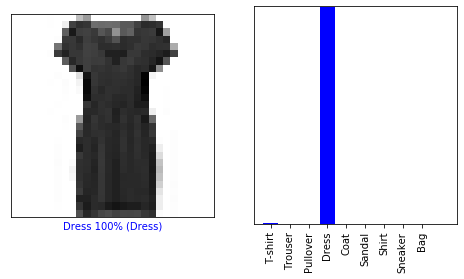

In [176]:
#Replace value of i with other index to check other product
i = 20
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_train, x_train)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_train)
plt.show()

### Now, to the above model, lets add Data Augmentation 

###15. Import the ImageDataGenrator from keras and fit the training images

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)



In [178]:
datagen.fit(x_train_scaled2)

# fits the model on batches with real-time data augmentation:
model2.fit_generator(datagen.flow(x_train_scaled2, y_train_encode, batch_size=32),
                    steps_per_epoch=len(x_train_scaled2) / 32, epochs=10)


  ...
    to  
  ['...']
Train for 1875.0 steps
Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 1.0043 - accuracy: 0.6582
Epoch 2/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6429 - accuracy: 0.7599
Epoch 3/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5690 - accuracy: 0.7897
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5294 - accuracy: 0.8049
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.5050 - accuracy: 0.8132
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4847 - accuracy: 0.8211
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4669 - accuracy: 0.8279
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4563 - accuracy: 0.8306
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.4452 - accuracy: 0.8350
Epoch 10/10
1875

####16. Showing 5 versions of the first image in training dataset using image datagenerator.flow()

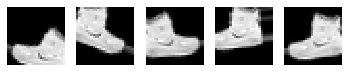

In [179]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_scaled2[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()